<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-датасета" data-toc-modified-id="Получение-датасета-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение датасета</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#name" data-toc-modified-id="name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>name</a></span></li><li><span><a href="#year_of_release" data-toc-modified-id="year_of_release-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>year_of_release</a></span></li><li><span><a href="#critic_score" data-toc-modified-id="critic_score-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>critic_score</a></span></li><li><span><a href="#user_score" data-toc-modified-id="user_score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>user_score</a></span></li><li><span><a href="#rating" data-toc-modified-id="rating-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>rating</a></span></li><li><span><a href="#full_sales" data-toc-modified-id="full_sales-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>full_sales</a></span></li><li><span><a href="#platform" data-toc-modified-id="platform-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>platform</a></span></li><li><span><a href="#genre" data-toc-modified-id="genre-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>genre</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Анализ-портрета-пользователя" data-toc-modified-id="Анализ-портрета-пользователя-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ портрета пользователя</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выявление определяющих успешность игры закономерностей

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Цель - выявить определяющие успешность игры закономерности. 


Так же нужно отсеять неактуальные данные - выделить период, по которому можно будет сделать прогноз на предстоящий год.

Подзадачи будут следующие:

1. Составить портрет пользователя каждого региона.
2. Определите для пользователя каждого региона (NA, EU, JP):
 - Ответить на вопрос: "влияют ли оценки критиков и пользователей на продажи самых прибыльных платформ и иных платформ?".
 - Самые популярные платформы (топ-5).
 - Самые популярные жанры (топ-5).
 
 
3. Проверить гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import scatter_matrix 
import numpy as np
from scipy import stats as st
import re
import seaborn


## Получение датасета 

In [2]:
df = pd.read_csv('/datasets/games.csv')
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Описание данных 

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Предобработка данных 

In [3]:
print('Информация о типе данных:')
df.info()

Информация о типе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [5]:
print('Количество пропусков в данных:')
print(df.isna().sum())


Количество пропусков в данных:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [6]:
print('Количество дубликатов:')
print(df.duplicated().sum())

Количество дубликатов:
0


### name 

Строки таблицы, с пропусками в столбце 'name':

In [7]:
display(df[df['name'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти строки можно удалить, они не несут актуальной для нашего проекта информации.

In [8]:
df.drop(list(df[df['name'].isna() == True].index), axis=0, inplace=True)

In [9]:
df = df.reset_index()

### year_of_release

Строки таблицы, с пропусками в столбце 'year_of_release':

In [10]:
display(df[df['year_of_release'].isna() == True])

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для начала заменим пропущенные значения на ноль, изменим тип на "целочисленный".

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце 'name', в некоторых строках есть данные о годе выпуска игры, извлечем эти данные и подставим в столбец 'year_of_release' в строки с нулевым значением.

In [12]:
for i in range(len(df)):
    
    if df['year_of_release'][i] == 0:
        
        s = re.findall('(\d+)', df['name'][i])
        
        s1 = "".join(c for c in s if  c.isdecimal())
        
        try:
            s1 = int(s1)
        except:
            s1 = 0
            
        if s1 > 1990 and s1 < 2016:
            
            df['year_of_release'][i] = s1
            
        else:
            
            df['year_of_release'][i] = 0
    
        

/tmp/ipykernel_98/930459581.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'][i] = s1
/tmp/ipykernel_98/930459581.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'][i] = 0


### critic_score

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заменим пропуски в столбце 'critic_score' на -1, для того чтобы в последствии проще фильтровать данные по этому столбцу.

In [14]:
df['critic_score'] = df['critic_score'].fillna(-1)

Заменим тип данных на "целочисленный".

In [15]:
df['critic_score'] = df['critic_score'].astype('int')

### user_score

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Превратим строковые значения в числовые, где это возможно.

Пропуски заменим на -1, для дальнейшей фильтрации.

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [18]:
df['user_score'] = df['user_score'].fillna(-1)

In [19]:
df['user_score'] = df['user_score'].astype('float')

### rating

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски на ноль.

In [21]:
df['rating'] = df['rating'].fillna(0)

### full_sales

Создадим признак 'full_sales' - общие продажи по регионам.

In [22]:
df['full_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### platform

In [23]:
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


### genre

In [24]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


##  Исследовательский анализ данных

In [25]:
display(df)
df.info()


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,0,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16708,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16709,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,0,0.01
16710,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16711,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,0,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   critic_score     16713 non-null  int64  
 10  user_score       16713 non-null  float64
 11  rating           16713 non-null  object 
 12  full_sales       16713 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.7+ MB


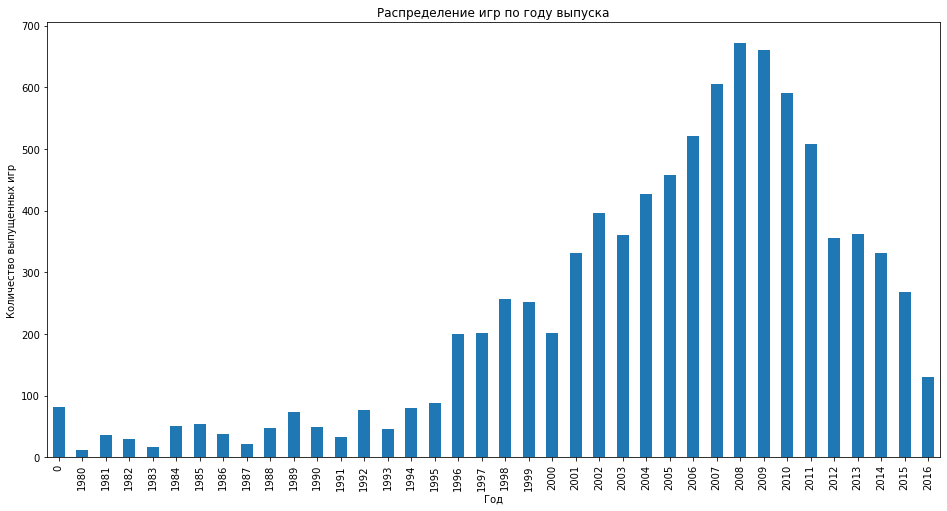

In [26]:
df.groupby('year_of_release')['full_sales'].sum().plot(kind='bar', figsize=(16, 8))

plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год')
plt.title('Распределение игр по году выпуска')
plt.show()


In [27]:
df = df.query('year_of_release > 1994')



**До 1995 года выпускалось менее 200х игр в год, поэтому данные за более ранние годы не сильно показательны.**

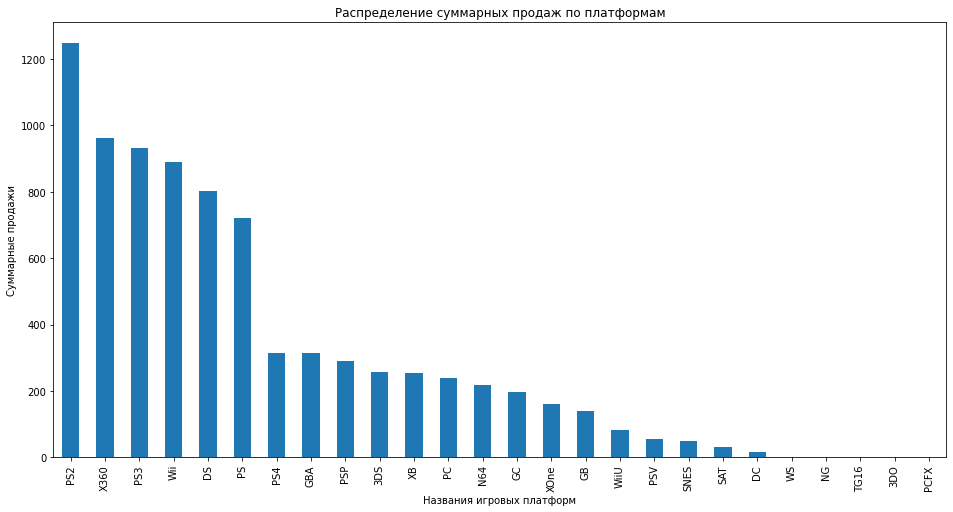

In [28]:
df.groupby('platform')['full_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 8))
plt.xlabel('Названия игровых платформ')
plt.ylabel('Суммарные продажи')
plt.title('Распределение суммарных продаж по платформам')
plt.show()


In [29]:
print('6 платформ с наибольшими суммарными продажами:')
print()
display(df.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head(6))





6 платформ с наибольшими суммарными продажами:



platform
PS2     1248.12
X360     961.30
PS3      931.34
Wii      891.18
DS       802.77
PS       721.55
Name: full_sales, dtype: float64

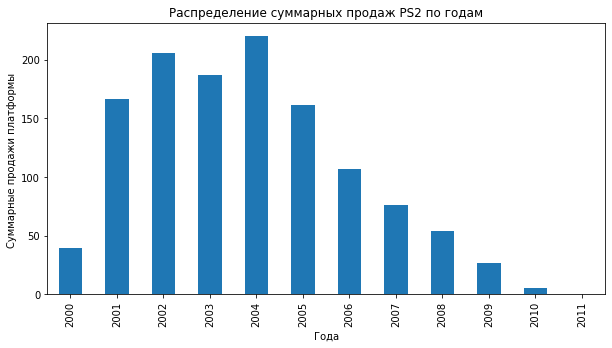

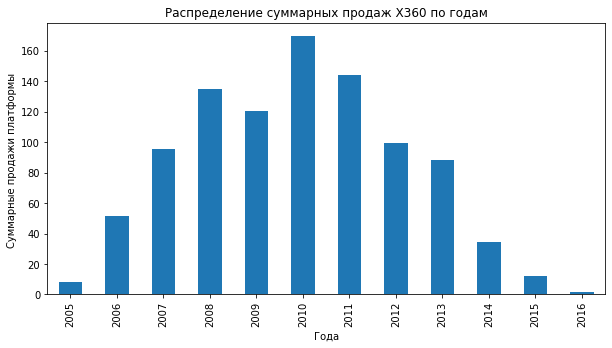

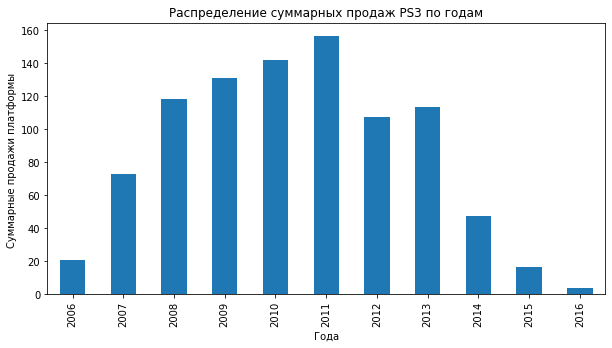

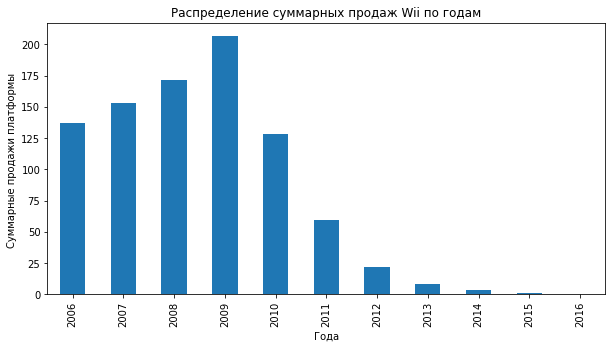

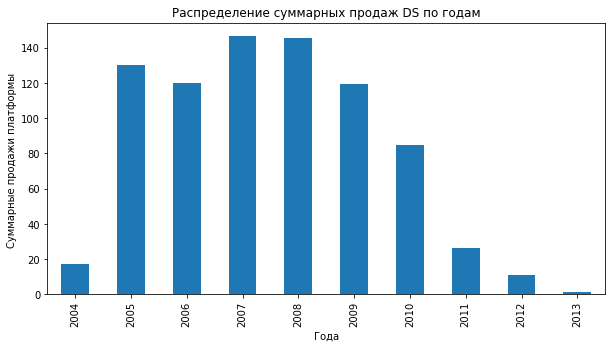

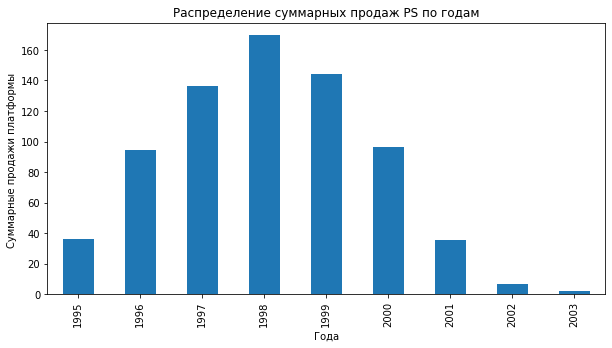

In [30]:
platforms = list(df.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head(6).index)

for cur_platform in platforms:
    df.query('platform == @cur_platform').groupby('year_of_release')['full_sales'].sum().plot(kind='bar', figsize=(10, 5))
    plt.xlabel('Года')
    plt.ylabel('Суммарные продажи платформы ')
    plt.title(f'Распределение суммарных продаж {cur_platform} по годам')
    plt.show()





<div style="border:solid lightblue 3px; padding: 20px">
<b>Вывод:</b>

Исходя из данных графиков видно, что в среднем срок жизни платформы примерно составляет 10 лет.

**Возьмем данные за актуальный период 5 лет.**


In [31]:
dfF = df.query('year_of_release > 2010')

Чтобы узнать какие платформы являются наиболее актуальными по прибыли:

 - найдем наиболее прибыльные платформы;
 - найдем распределение прибылей по годам;
 - отсеим платформы, чьи прибыли с годами снижаются критически.

In [32]:
print('10 платформ с наибольшими суммарными продажами (за актуальный период):')
print()
display(dfF.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head(10))


10 платформ с наибольшими суммарными продажами (за актуальный период):



platform
PS3     445.57
X360    380.43
PS4     314.14
3DS     257.81
XOne    159.32
PC       98.03
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
Name: full_sales, dtype: float64

In [33]:
Top10_platform = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU', 'PSV', 'DS']

for cur_platform in Top10_platform:
    print(cur_platform)
    print()
    print(dfF.query('platform == @cur_platform').groupby('year_of_release')['full_sales'].sum())
    print()
    print()




PS3

year_of_release
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: full_sales, dtype: float64


X360

year_of_release
2011    143.89
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: full_sales, dtype: float64


PS4

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: full_sales, dtype: float64


3DS

year_of_release
2011    63.20
2012    51.36
2013    56.57
2014    43.76
2015    27.78
2016    15.14
Name: full_sales, dtype: float64


XOne

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: full_sales, dtype: float64


PC

year_of_release
2011    35.03
2012    23.22
2013    12.73
2014    13.28
2015     8.52
2016     5.25
Name: full_sales, dtype: float64


Wii

year_of_release
2011    59.65
2012    21.71
2013     8.59
2014     3.75
2015     1.14
2016     0.18
Name: full_sales, dtype: float64


WiiU

year_of_release
2012    17.56
2013    21.65
2014    2

<div style="border:solid lightblue 3px; padding: 20px">
<b>Вывод:</b>

Потенциально прибыльные платформы: PS4 и XOne

In [34]:
dfF_PS4 = dfF.query('platform == "PS4"')
dfF_XOne = dfF.query('platform == "XOne"')

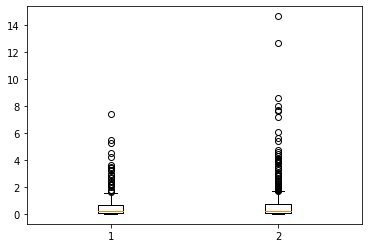

In [35]:
plt.boxplot([dfF_XOne['full_sales'], dfF_PS4['full_sales']])
plt.show()

**Взаимосвязь оценок критиков на общие продажи PS4:**

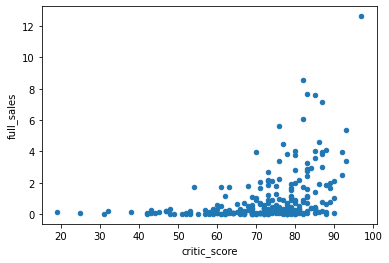

0.40656790206178095


In [36]:
dfF_PS4.query('critic_score > 0').plot(x='critic_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_PS4.query('critic_score > 0')['critic_score'].corr(dfF_PS4.query('critic_score > 0')['full_sales']))


**Взаимосвязь значительная** 

**Взаимосвязь оценок пользователей на общие продажи PS4:**

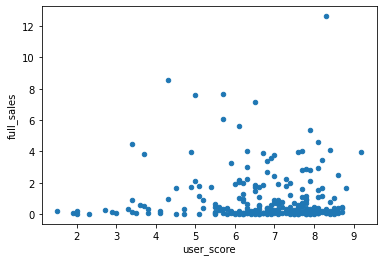

-0.031957110204556424


In [37]:
dfF_PS4.query('user_score > 0').plot(x='user_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_PS4.query('user_score > 0')['user_score'].corr(dfF_PS4.query('user_score > 0')['full_sales']))


**Взаимосвязь незначительная, отрицательная**

**Взаимосвязь оценок критиков на общие продажи XOne:**

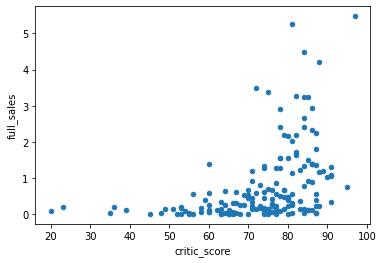

0.4169983280084017


In [38]:
dfF_XOne.query('critic_score > 0').plot(x='critic_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_XOne.query('critic_score > 0')['critic_score'].corr(dfF_XOne.query('critic_score > 0')['full_sales']))


**Взаимосвязь значительная**

**Взаимосвязь оценок пользователей на общие продажи XOne:**

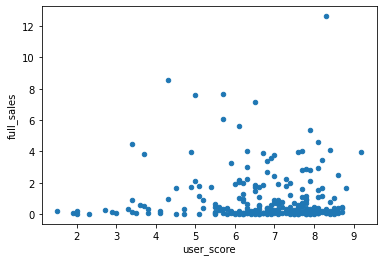

-0.06892505328279414


In [39]:
dfF_PS4.query('user_score > 0').plot(x='user_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_XOne.query('user_score > 0')['user_score'].corr(dfF_XOne.query('user_score > 0')['full_sales']))


**Взаимосвязь незначительная, отрицательная**

In [40]:
dfF_other = dfF.query('platform != "PS4" and platform != "XOne"')

**Взаимосвязь оценок критиков на общие продажи иных платформ:**

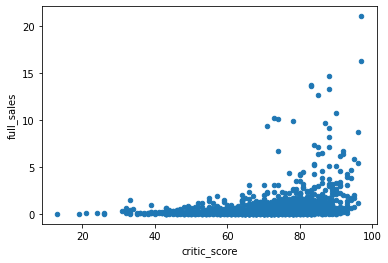

0.3108050498632


In [41]:
dfF_other.query('critic_score > 0').plot(x='critic_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_other.query('critic_score > 0')['critic_score'].corr(dfF_other.query('critic_score > 0')['full_sales']))


**Взаимосвязь присутствует**

**Взаимосвязь оценок пользователей на общие продажи иных платформ:**

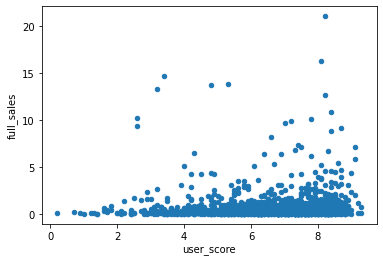

0.04697591188404159


In [42]:
dfF_other.query('user_score > 0').plot(x='user_score', y='full_sales', kind='scatter')
plt.show()
print(dfF_other.query('user_score > 0')['user_score'].corr(dfF_other.query('user_score > 0')['full_sales']))


**Взаимосвязь незначительная, положительная**

<div style="border:solid lightblue 3px; padding: 20px">
<b>Вывод:</b>

Взаимосвязь продаж от оценок критиков для платформы PS4 - значительная.
    
Взаимосвязь продаж от оценок пользователей для платформы PS4 - незначительная, отрицательная, либо не линейная.
    
Взаимосвязь продаж от оценок критиков для платформы XOne - значительная.
    
Взаимосвязь продаж от оценок пользователей для платформы XOne - незначительная, отрицательная, либо не линейная.
    
Взаимосвязь продаж от оценок критиков для всех остальных платформ - небольшая. 
    
Взаимосвязь продаж от оценок пользователей для всех остальных платформ - незначительная, положительная, либо не линейная.

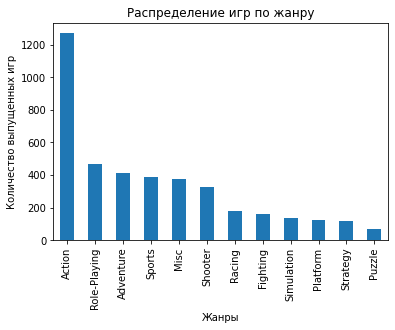

In [43]:
dfF['genre'].value_counts().plot(kind='bar')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Жанры')
plt.title('Распределение игр по жанру')
plt.show()

In [44]:
print('Распределение жанров по общим продажам:')
print()
display(dfF.groupby('genre')['full_sales'].sum().sort_values(ascending=False))

Распределение жанров по общим продажам:



genre
Action          558.15
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.36
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: full_sales, dtype: float64

<div style="border:solid lightblue 3px; padding: 20px">
<b>Вывод:</b>

Больше всего игр жанра Экшен, он же самый прибыльный жанр по общим продажам. Шутер - второй по прибыльности жанр игр, но по полуярности он стоит только на четвертом месте. Не всегда самые популярные жанры игр приносят больше всего прибыли.

## Анализ портрета пользователя


In [45]:
print('5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:')
print()
display(dfF.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head())

5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:



platform
PS3     445.57
X360    380.43
PS4     314.14
3DS     257.81
XOne    159.32
Name: full_sales, dtype: float64

**NA**

In [46]:
#NA

print('Распределение платформ по продажам в NA:')
print()
display(dfF.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head())

Распределение платформ по продажам в NA:



platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

In [47]:
 226.80 * 100 / 380.38  


59.62458594037542

**Для региона NA самая популярная платформа - Х360 (почти 60% мировых продаж), в отличии от мировой - PS3.**

In [48]:
print('Распределение жанров по продажам в NA:')
print()
display(dfF.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head())

Распределение жанров по продажам в NA:



genre
Action          230.98
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

**В отличии от мира, Спорт здесь популярнее.**

In [49]:
print('Распределение мировых продаж по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['full_sales'].sum().sort_values(ascending=False))

print('Распределение продаж в NA по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['na_sales'].sum().sort_values(ascending=False))

Распределение мировых продаж по рейтингу:

rating
M       667.16
E       389.44
T       254.03
E10+    230.86
EC        0.45
RP        0.04
Name: full_sales, dtype: float64
Распределение продаж в NA по рейтингу:

rating
M       308.51
E       170.17
E10+    117.72
T       109.31
EC        0.42
RP        0.00
Name: na_sales, dtype: float64


**Игры с рейтингом М и Е самые популярные в мире и в NA, однако на третьем месте в мире игры с рейтингом Т, а в NA - Е10+.**

In [50]:
print('5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:')
print()
display(dfF.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head())

5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:



platform
PS3     445.57
X360    380.43
PS4     314.14
3DS     257.81
XOne    159.32
Name: full_sales, dtype: float64

**EU**

In [51]:
#EU

print('Распределение платформ по продажам в EU:')
print()
display(dfF.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head())

Распределение платформ по продажам в EU:



platform
PS3     163.10
PS4     141.09
X360    117.14
3DS      61.27
PC       56.95
Name: eu_sales, dtype: float64

**В отличии от мира, в EU на втором месте по пулярности стоит PS4, а X360 наоборот на третьем месте, а не на втором как в мире.**

In [52]:
print('Распределение жанров по общим продажам:')
print()
display(dfF.groupby('genre')['full_sales'].sum().sort_values(ascending=False).head())

Распределение жанров по общим продажам:



genre
Action          558.15
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Name: full_sales, dtype: float64

In [53]:
print('Распределение жанров по продажам в EU:')
print()
display(dfF.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head())

Распределение жанров по продажам в EU:



genre
Action          199.37
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.62
Name: eu_sales, dtype: float64

**В отличии от мира, Спорт здесь популярнее.**

In [54]:
print('Распределение мировых продаж по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['full_sales'].sum().sort_values(ascending=False))

print('Распределение продаж в EU по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

Распределение мировых продаж по рейтингу:

rating
M       667.16
E       389.44
T       254.03
E10+    230.86
EC        0.45
RP        0.04
Name: full_sales, dtype: float64
Распределение продаж в EU по рейтингу:

rating
M       250.51
E       141.73
T        83.16
E10+     78.00
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64


**Игры с рейтингом М, Е, Т и E10+ самые популярные в мире и в EU, однако на пятом месте в мире игры с рейтингом EC, а в NA - RP и наоборот.**

In [55]:
print('5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:')
print()
display(dfF.groupby('platform')['full_sales'].sum().sort_values(ascending=False).head())

5 платформ с наибольшими суммарными продажами (за актуальный период) в мире:



platform
PS3     445.57
X360    380.43
PS4     314.14
3DS     257.81
XOne    159.32
Name: full_sales, dtype: float64

**JP**

In [56]:
#JP

print('Распределение платформ по продажам в JP:')
print()
display(dfF.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head())

Распределение платформ по продажам в JP:



platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64

**В JP самое необычное распределение популярных игровых платформ, в отличии от мира здесь самая популярная платформа - это 3DS, а X360 вообще нет в пятерке лидеров.**

In [57]:
print('Распределение жанров по общим продажам:')
print()
display(dfF.groupby('genre')['full_sales'].sum().sort_values(ascending=False).head())


Распределение жанров по общим продажам:



genre
Action          558.15
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Name: full_sales, dtype: float64

In [58]:
print('Распределение жанров по продажам в JP:')
print()
display(dfF.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head())


Распределение жанров по продажам в JP:



genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64

**JP первый регион, где Экшен менее популярен, чем Role-Playing.**

In [59]:
print('Распределение мировых продаж по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['full_sales'].sum().sort_values(ascending=False))

print('Распределение продаж в JP по рейтингу:')
print()
print(dfF.query('rating != 0').groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

Распределение мировых продаж по рейтингу:

rating
M       667.16
E       389.44
T       254.03
E10+    230.86
EC        0.45
RP        0.04
Name: full_sales, dtype: float64
Распределение продаж в JP по рейтингу:

rating
E       36.68
T       33.39
M       26.14
E10+    11.23
EC       0.00
RP       0.00
Name: jp_sales, dtype: float64


**Игры с рейтингом E здесь популярнее, чем в мире, так же как и с рейтингом Т.**

## Проверка гипотез

**Гипотезы:**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [60]:
XOne = dfF.query('(platform == "XOne") and (user_score > 0)')

PC = dfF.query('(platform == "PC") and (user_score > 0)')

alpha = 0.05

results = st.ttest_ind(XOne['user_score'], PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6601000395360657
Отвергаем нулевую гипотезу


Нулевая гипотеза состояла в том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, альтернативная, - что разные.
Создали две выборки с данными о пользовательском рейтинге интересующих нас платформ и на основе этих данных провели эксперимент. Погрешность взяли 5%.

In [61]:
Action = dfF.query('(genre == "Action") and (user_score > 0)')

Sports = dfF.query('(genre == "Sports") and (user_score > 0)')

alpha = 0.05

results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.147206374856738e-24
Отвергаем нулевую гипотезу


Аналогичную процедуру провели для жанров игр.

## Общий вывод

**Принципы работы с данными отработаны.
Определяющие закономерность успешности игры выявлены. 
Проверены гипотезы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не подтвердилась.
- средние пользовательские рейтинги жанров Action и Sports разные - не подтвердилась.
- вот такие дела.